# Exploratory Data Analysis

### Banking Marketing Campaign

In [4]:
#Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import json
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings

# To supress warnings
warnings.filterwarnings("ignore", category=FutureWarning)

***STEP 1: PROBLEM STATEMENT & DATA COLLECTION***

The bank uses phone calls to reach out to customers and conduct marketing campaigns targeting long-term deposits. The goal is to optimize these contacts by targeting customers who are most likely to stick with the product.

**Project Goal:**
Create a classification model to predict whether or not a customer will take out a long-term deposit based on data provided by the bank.

**1.1 PROBLEM STATEMENT**

**Customer Profile:**

* Which age groups are most likely to take up a long-term deposit?
* Is there a correlation between the type of work (job) or level of education (education) and the decision to hire the deposit?
* Are customers with personal loans or mortgages less likely to stick to long-term deposits?

**Demographic and Marital Status Analysis:**

* Is there a difference in the adherence rate between married, single and other marital statuses?
* Do customers of certain age groups or marital status tend to adhere more to long-term products?

**Contact History and Adhesion Probability:**

* Which contact method has the highest success rate?
* Does the duration of contact influence the probability of conversion? Is there an optimal duration to maximize adherence?
* Is there a relationship between the number of contacts made in previous campaigns (campaign, previous) and the probability of adherence?

**Temporal Analysis:**

*  Does the month (month) or day of the week (day_of_week) of the contact affect the probability of adherence?
* Do success rates vary throughout the year or across days of the week?

**Economic Indicators and Customer Behavior:**

* How do macroeconomic variables such as the 3-month EURIBOR rate (euribor3m) or employment rate (emp.var.rate) influence customers' decision?
* Is there a relationship between the consumer confidence index (cons.conf.idx) and the willingness of customers to join the deposit?

**Previous Campaign Analysis:**

* How does the result of previous campaigns (poutcome) influence customers’ decisions?
* Are customers who were contacted in previous campaigns more likely to participate in this campaign?

**Customer Profile and Product Adherence:**

* Is there a common profile among customers who subscribe to long-term deposits? How do age, marital status, type of work and education level correlate with adherence?
* Is there a pattern in clients showing a greater propensity to accept long-term investment products?

**1.2. DATA COLLECTION**

In [5]:
pd.options.display.max_columns=None
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.to_csv("../data/raw/bank_data.csv", index=False)

***STEP 2: EXPLORATION & DATA CLEANING***

In [35]:
def check_data(df):
    print("Dataset dimensions:")
    print(df.shape)
    print("\nDataset informations:")
    print(df.info())
    print("\nMissing values ​​by column:")
    print(df.isna().sum()[df.isna().sum()>0])

check_data(df)

Dataset dimensions:
(41188, 21)

Dataset informations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188

In [ ]:
# another option to obtain the total number of null values in each column:
# df.isnull().sum()

In [23]:
# Identificar variáveis numéricas
numerical_vars = df.select_dtypes(include=['float', 'int']).columns
num_numerical_vars = len(numerical_vars)  # Contar o número de variáveis numéricas

# Identificar variáveis categóricas
categorical_vars = df.select_dtypes(include=['object']).columns
num_categorical_vars = len(categorical_vars)  # Contar o número de variáveis categóricas

# Exibir os resultados
print(f"Numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))
print('\n')
print(f"Categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))



Numerical variables: 10
Numerical variables: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


Categorical variables: 11
Categorical variables: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


##### Statements

* This DataFame is composed by 41 188 rows and 21 columns (variables). 
* There are no variables with null values. 
* The data has:
    * **10 numerical variables** - 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m' and 'nr.employed';
    * **6 categorical variables** - 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome' and 'y'.

* age. Age of customer (numeric)
* job. Type of job (categorical)
* marital. Marital status (categorical)
* education. Level of education (categorical)
* default. Do you currently have credit (categorical)
* housing. Do you have a housing loan (categorical)
* loan. Do you have a personal loan? (categorical)
* contact. Type of contact communication (categorical)
* month. Last month in which you have been contacted (categorical)
* day_of_week. Last day on which you have been contacted (categorical)
duration. Duration of previous contact in seconds (numeric)
* campaign. Number of contacts made during this campaign to the customer (numeric)
* pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric)
* previous. Number of contacts made during the previous campaign to the customer (numeric)
* poutcome. Result of the previous marketing campaign (categorical)
* emp.var.rate. Employment variation rate. Quarterly indicator (numeric)
* cons.price.idx. Consumer price index. Monthly indicator (numeric)
* cons.conf.idx. Consumer confidence index. Monthly indicator (numeric)
* euribor3m. EURIBOR 3-month rate. Daily indicator (numeric)
* nr.employed. Number of employees. Quarterly indicator (numeric)
* y. TARGET. Whether the customer takes out a long-term deposit or not (categorical)

****Statistics:****

In [36]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


***2.2. ELIMINATE DUPLICATES***

In [37]:
# Verificar o número de duplicatas no DataFrame
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Se houver duplicatas, eliminá-las
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows have been removed.")
else:
    print("No duplicate rows found.")


Number of duplicate rows: 12
Duplicate rows have been removed.


***2.3. ELIMINATE IRRELEVANT INFORMATION***

* all variables will be kept.

In the early stages of developing a classification model to predict whether or not a customer will take out a long-term deposit, I chose to keep all variables because I do not yet know the impact of each variable on the model.

***STEP 3: ANALYSIS OF UNIVARIATE VARIABLES***

**3.1. ANALYSIS OF CATEGORICAL VARIABLES**

In [38]:
def plot_categorical_variables(df, categorical_columns=None, hue=None):
    """
    Plota gráficos de contagem para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame a ser analisado.
    - categorical_columns: Lista de colunas categóricas. Se None, seleciona automaticamente colunas do tipo 'object'.
    - hue: Variável de cor para as colunas (opcional), como a variável target, se relevante.
    """
    # Detecta colunas categóricas automaticamente, se não fornecidas
    if categorical_columns is None:
        categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Configura o layout dos subplots para ter 3 colunas
    num_cols = 3
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # calcula o número de linhas necessário
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 5 * num_rows))

    # Flattea a matriz de eixos para facilitar a iteração
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        sns.countplot(ax=axes[i], data=df, x=col, hue=hue)
        axes[i].set_title(f"Distribution of {col}")
        axes[i].tick_params(axis='x', rotation=90)

    # Remove eixos extras se houver menos colunas do que subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


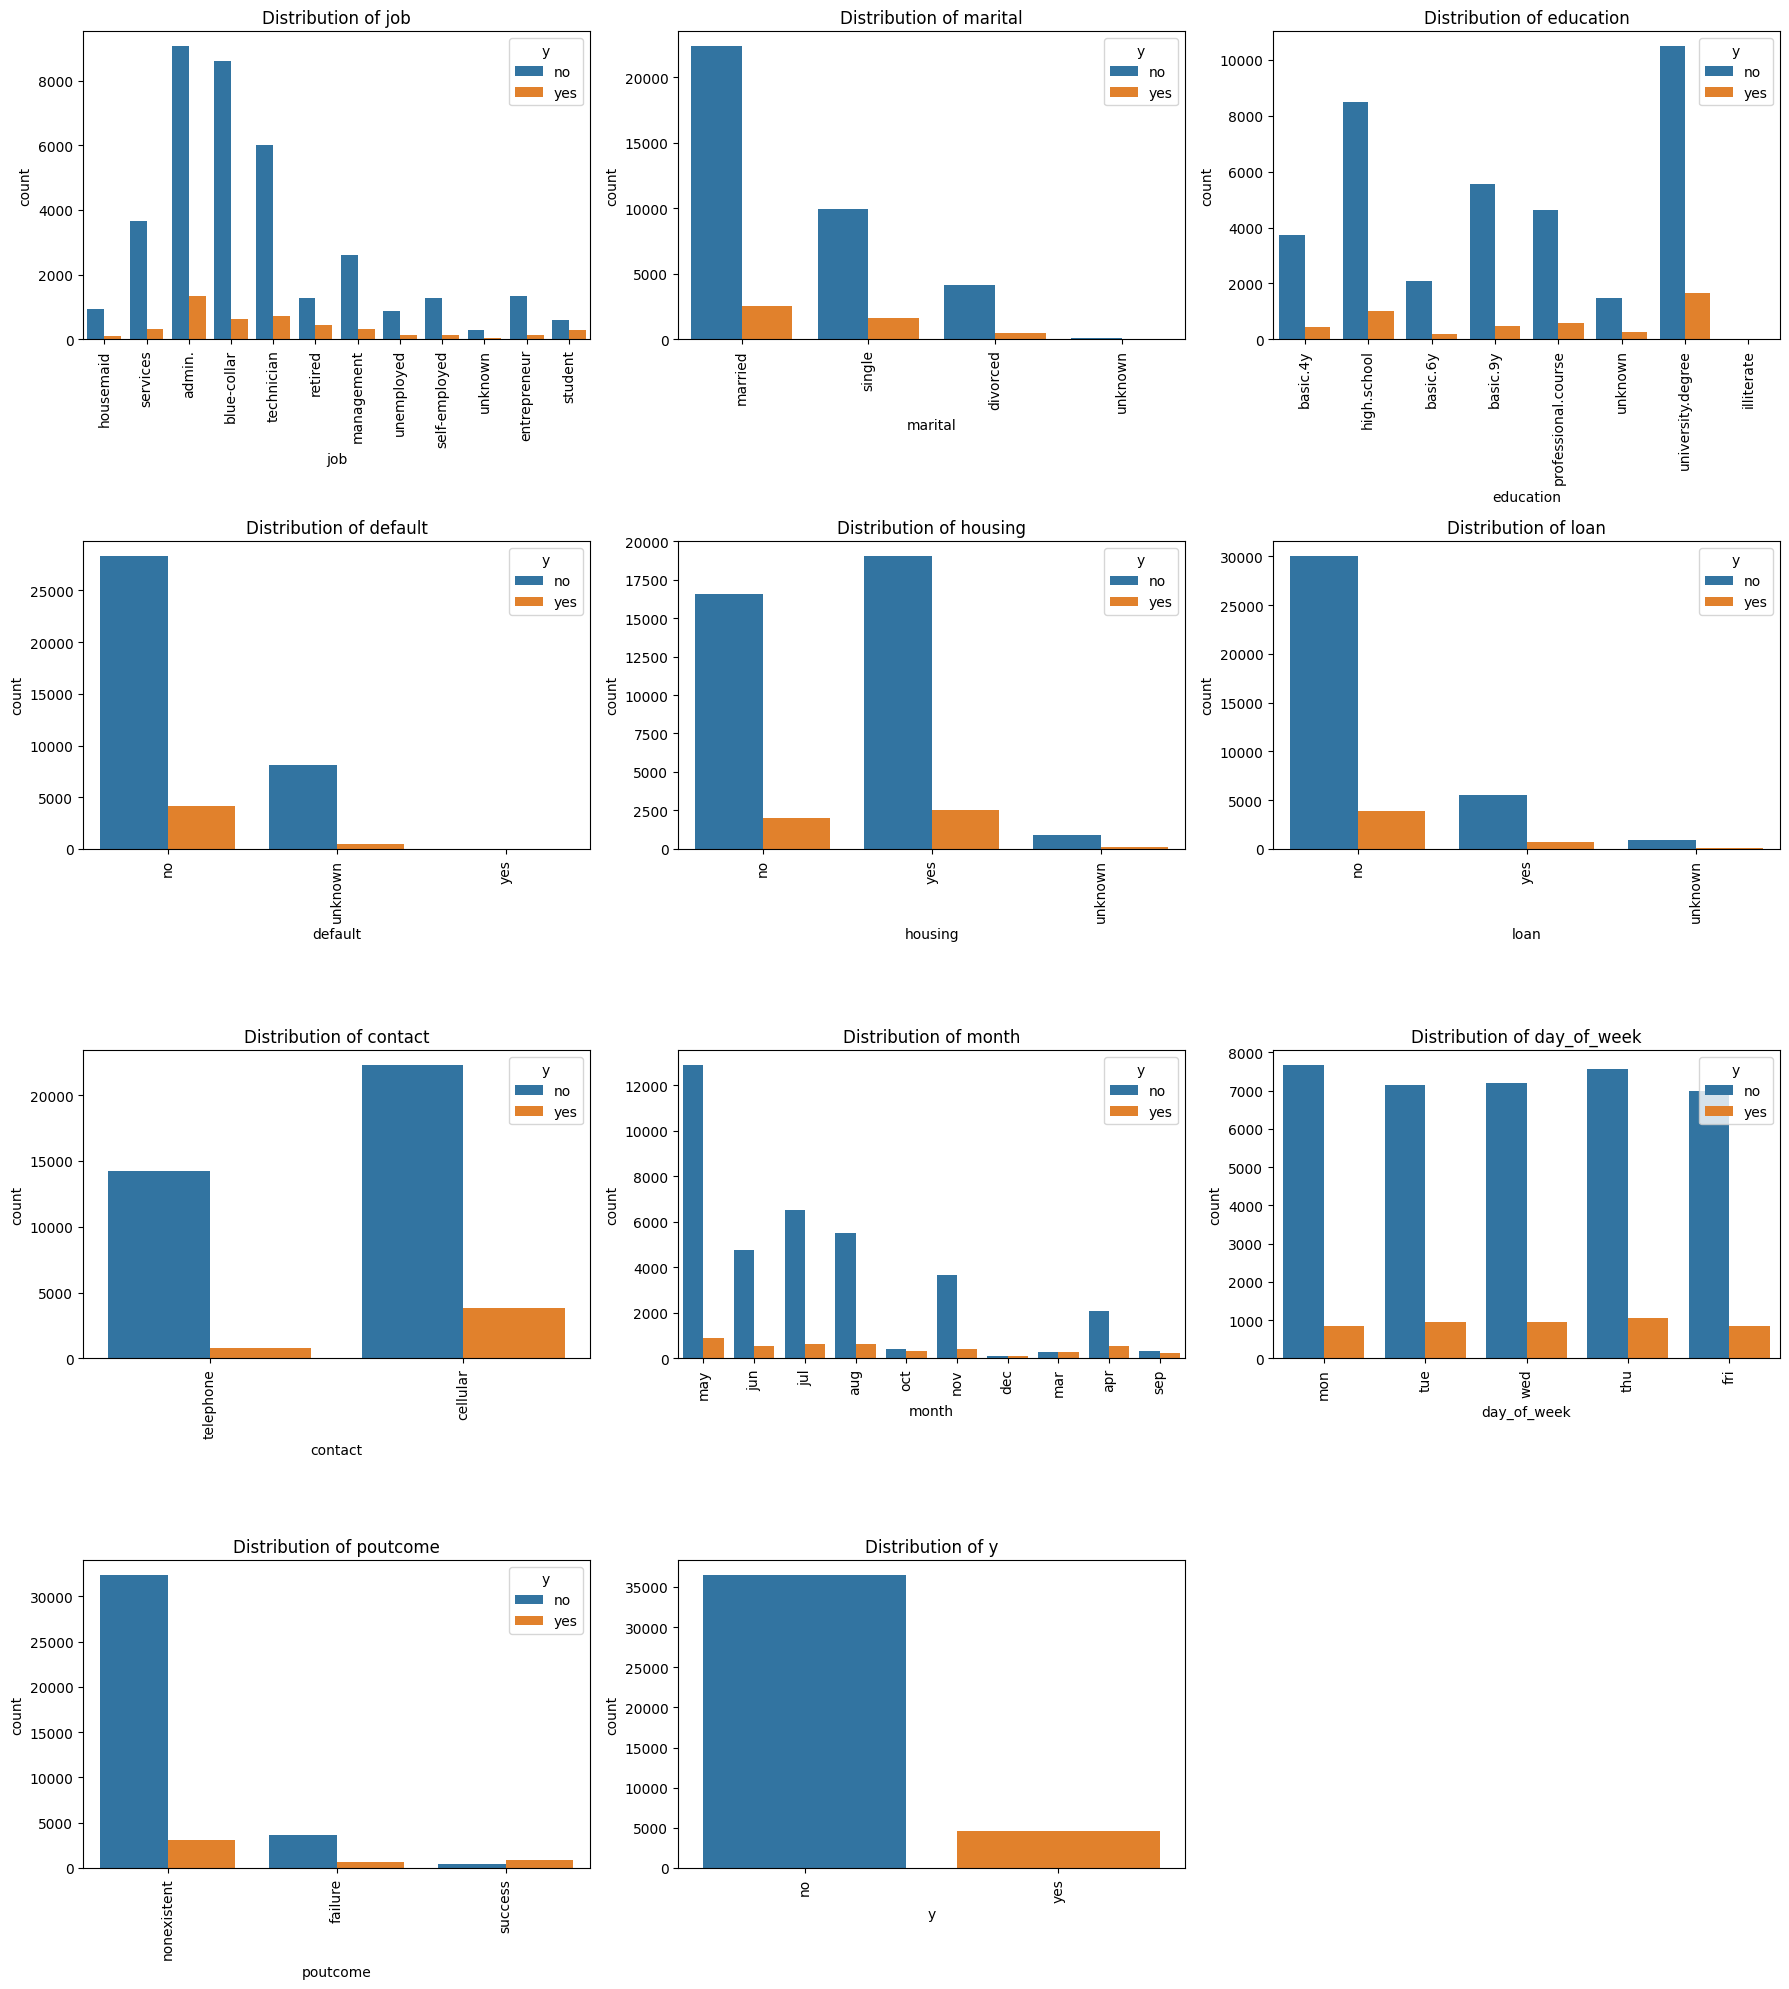

In [40]:
# Obtaining categorical variables graphs
plot_categorical_variables(df=df, hue='y')

#### Statements 
With the representation of each variable by plotting their histogram, it's possible to determine that:

* ****job**** - Most clients are in professions such as "blue-collar" and "management". Professions such as "student" and others that are unknown ("unknown") have lower frequency and low adhesion rate.

* ****marital**** - The majority of clients are married, with a slightly lower membership rate compared to singles and divorcees.

* ****education**** -  Clients with secondary education are the majority, followed by those with tertiary education. The adherence rate is similar between different levels of education.

* ****default**** - Most customers are not in default (default = currently on credit), and those who are have a low uptake rate.

* ****housing**** - Most customers do not have a home loan, and those who do tend to have lower uptake.

* ****loan**** - Similar to housing, most do not have personal loans, and the uptake rate is lower for those with loans.

* ****contact**** - Contact via cell phone is more common and associated with a higher adoption rate compared to landlines.

* ****month**** - May is the month with the highest number of contacts, but has a relatively low opt-in rate. Other months, such as March and December, have fewer contacts, but slightly higher opt-in rates.

* ****day_of_week**** - There is not a large variation in the adherence rate between days of the week, indicating that the day of contact may have little influence.

* ****poutcome**** - Customers with a "successful" result in the previous campaign have a significantly higher opt-in rate for this campaign.

* ****y (target)**** - Most customers did not join the long-term deposit, indicating that the overall adoption rate is low.





**3.2. ANALYSIS OF NUMERICAL VARIABLES**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerical_variables(df, numerical_columns=None):
    """
    Plota histogramas e boxplots para variáveis numéricas em um layout de 2 colunas.
    
    Parâmetros:
    - df: DataFrame a ser analisado.
    - numerical_columns: Lista de colunas numéricas. Se None, seleciona automaticamente colunas do tipo 'float' e 'int'.
    """
    # Detecta colunas numéricas automaticamente, se não fornecidas
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=['float', 'int']).columns.tolist()

    # Calcula o número de linhas necessário
    num_vars = len(numerical_columns)
    num_rows = (num_vars + 1) // 2  # Dividido por 2 colunas, arredondando para cima

    # Configura o layout dos subplots
    fig, axes = plt.subplots(num_rows * 2, 2, figsize=(14, num_rows * 4))
    plt.suptitle('Distribution of Numerical Variables', fontsize=16, y=1.02)

    # Achata o array de eixos para facilitar a iteração
    axes = axes.flatten()

    # Loop para criar histogramas e boxplots para cada variável numérica
    for i, col in enumerate(numerical_columns):
        sns.histplot(ax=axes[i * 2], data=df, x=col).set(xlabel=None, title=col.capitalize())
        sns.boxplot(ax=axes[i * 2 + 1], data=df, x=col).set(xlabel=None, title=col.capitalize())
        axes[i * 2 + 1].set(xlabel=None)  # Remove o rótulo x do boxplot para consistência

    # Remove eixos extras se houver um número ímpar de variáveis
    for j in range(i * 2 + 2, len(axes)):
        fig.delaxes(axes[j])

    # Ajusta o layout para evitar sobreposição
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


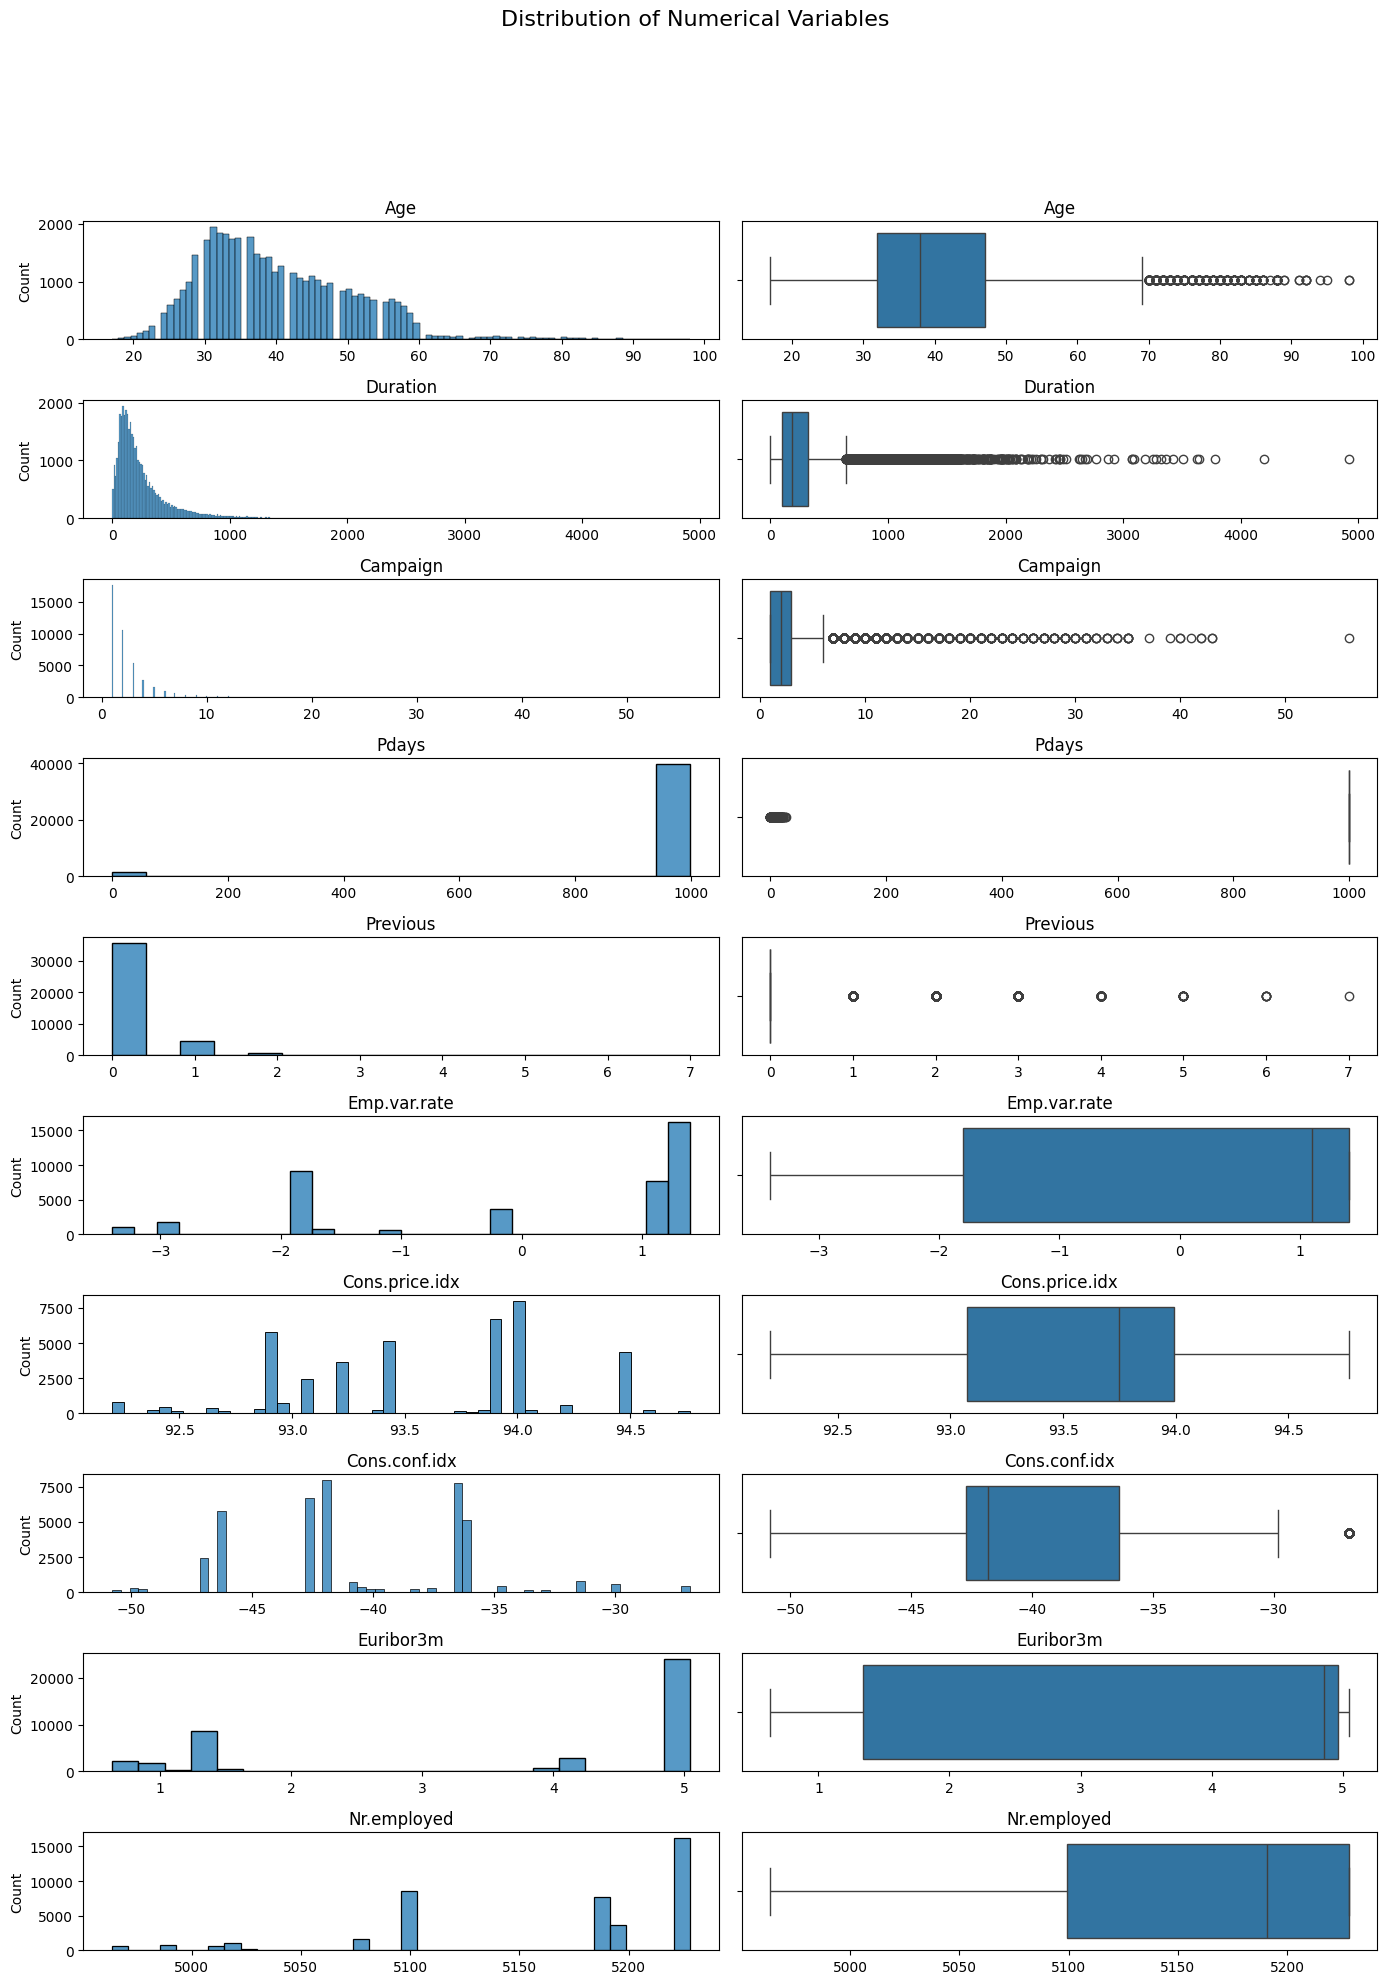

In [14]:

plot_numerical_variables(df=df)


#### Statements

 
* **Price:** 

***STEP 4: ANALYSIS OF MULTIVARIATE VARIABLES***

Multivariate analysis also allows combining the class with several predictors at the same time to enrich the analysis.

**4.1 NUMERICAL-NUMERICAL ANALYSIS**

